In [2]:
import pandas as pd

# Initialize variables
data = []
columns = ['Timestep', 'Chunk', 'Coord1', 'Ncount', 'vx']

# Read and parse the file
with open('./profile.wall.2d', 'r') as file:
    lines = file.readlines()
    
    for i, line in enumerate(lines):
        line = line.strip()
        
        # Skip comment lines
        if line.startswith("#"):
            continue
        
        # Identify timestep metadata lines
        if len(line.split()) == 3:
            timestep, num_chunks, total_count = map(float, line.split())
        else:
            # Parse chunk data
            chunk_data = list(map(float, line.split()))
            chunk = int(chunk_data[0])  # First column is chunk number
            data.append([timestep, chunk] + chunk_data[1:])

# Create DataFrame
df = pd.DataFrame(data, columns=columns)

# Display the DataFrame
print(df)


     Timestep  Chunk  Coord1  Ncount        vx
0     10000.0      1   0.025  60.000  0.000000
1     10000.0      2   0.075  60.000  0.000000
2     10000.0      3   0.125  44.684 -0.014892
3     10000.0      4   0.175  53.562  0.037851
4     10000.0      5   0.225  52.130  0.016407
..        ...    ...     ...     ...       ...
135   70000.0     16   0.775  50.846  2.323580
136   70000.0     17   0.825  52.450  2.511650
137   70000.0     18   0.875  45.216  2.660190
138   70000.0     19   0.925  60.000  2.700000
139   70000.0     20   0.975  40.000  2.700000

[140 rows x 5 columns]


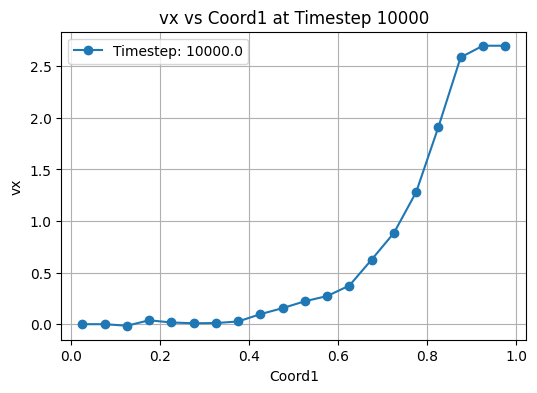

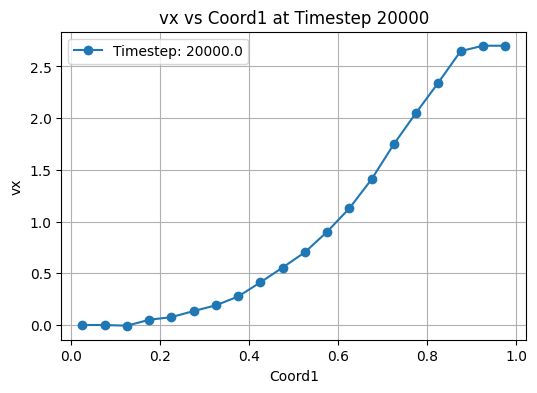

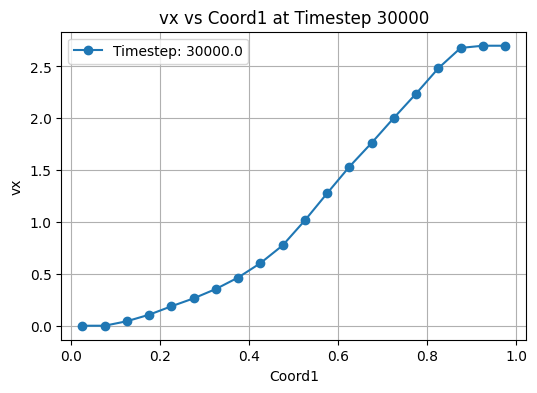

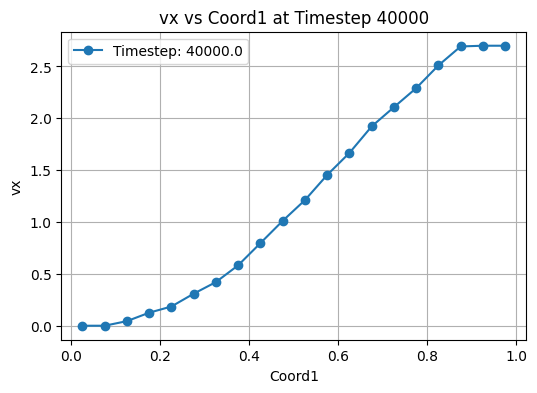

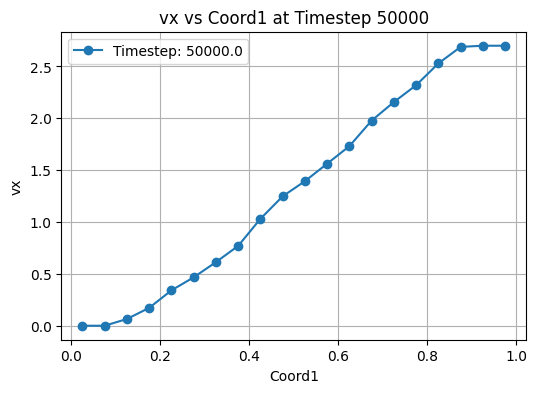

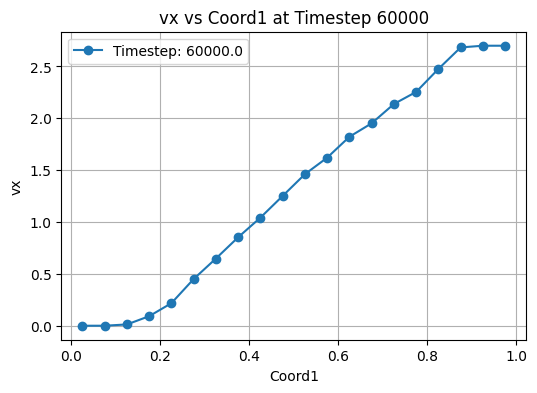

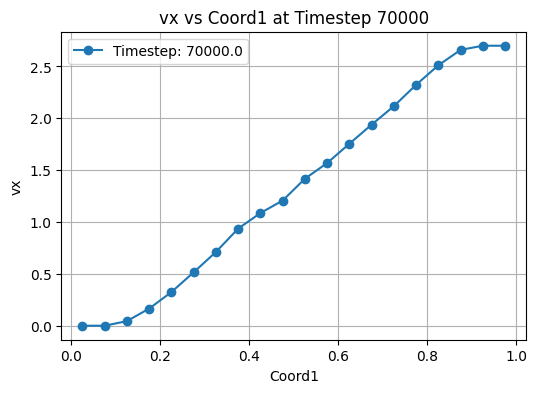

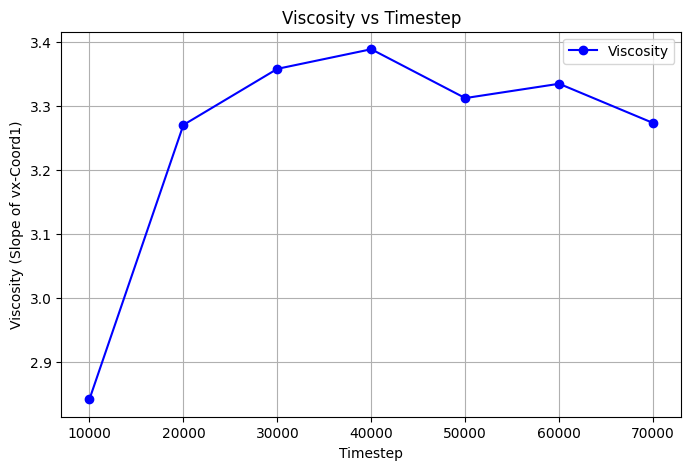

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress

# Assuming the DataFrame `df` has been created as before
# Initialize an empty list to store viscosity data
viscosity_data = []

# Get unique timesteps
timesteps = df['Timestep'].unique()

# Loop through each timestep
for timestep in timesteps:
    # Filter data for the current timestep
    timestep_data = df[df['Timestep'] == timestep]
    
    # Plot vx vs Coord1
    plt.figure(figsize=(6, 4))
    plt.plot(timestep_data['Coord1'], timestep_data['vx'], marker='o', label=f'Timestep: {timestep}')
    plt.xlabel('Coord1')
    plt.ylabel('vx')
    plt.title(f'vx vs Coord1 at Timestep {int(timestep)}')
    plt.legend()
    plt.grid()
    plt.show()
    
    # Calculate viscosity (slope of vx vs Coord1)
    slope, _, _, _, _ = linregress(timestep_data['Coord1'], timestep_data['vx'])
    viscosity_data.append({'Timestep': timestep, 'Viscosity': slope})

# Create a DataFrame for viscosity vs timestep
viscosity_df = pd.DataFrame(viscosity_data)

# Plot viscosity vs timestep
plt.figure(figsize=(8, 5))
plt.plot(viscosity_df['Timestep'], viscosity_df['Viscosity'], marker='o', color='b', label='Viscosity')
plt.xlabel('Timestep')
plt.ylabel('Viscosity (Slope of vx-Coord1)')
plt.title('Viscosity vs Timestep')
plt.legend()
plt.grid()
plt.show()
